In [22]:
import notebook_util
import cv2
from matplotlib import pyplot as plt
import numpy as np
notebook_util.override_imshow(cv2)

%matplotlib inline

Showing Image: Original Image


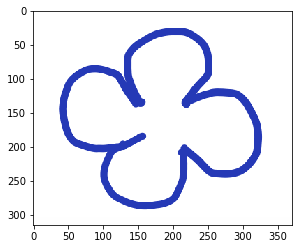

In [23]:
import numpy as np
import cv2

image_data = cv2.imread('resources/flower3.png')
cv2.imshow('Original Image', image_data)

In [24]:
gray = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)
# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

In [25]:
# Find contours 
_, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

Showing Image: Convex Hull


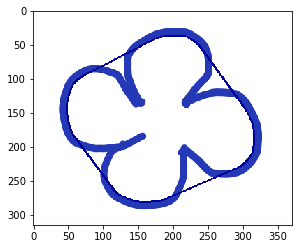

Showing Image: Convex Hull


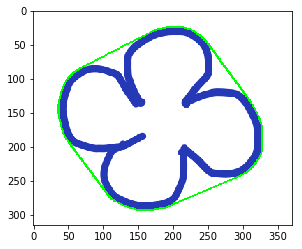

In [26]:
# Iterate through contours and draw the convex hull
for i,c in enumerate(contours):
    work_image = image_data.copy()
    hull = cv2.convexHull(c)
    color = [(155, 0, 0),(0, 255, 0),(0, 0, 255)]
    cv2.drawContours(work_image, [hull], 0, color[i], 2)
    cv2.imshow('Convex Hull', work_image)